In [3]:
import yfinance as yf

# Laden der Daten für einen bestimmten Ticker (z. B. Apple)
ticker = "BTC-EUR"  # Ticker für Apple
data = yf.download(ticker, start="2014-09-17", end="2025-01-25", interval="1d")

# Daten speichern
data.to_csv("BTC-EUR.csv")

print("Daten erfolgreich heruntergeladen!")

[*********************100%***********************]  1 of 1 completed

Daten erfolgreich heruntergeladen!


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
bitcoin = pd.read_csv("BTC-EUR.csv", index_col="Date", parse_dates=True)   # nous permet d#agir sur les date en precisant index_col et parse_dates

In [81]:
bitcoin.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,355.957367,361.468506,351.586884,359.546204,16389166
2014-09-18,328.539368,355.505402,319.789459,355.588409,26691849
2014-09-19,307.761139,330.936707,298.921021,328.278503,29560103
2014-09-20,318.758972,329.978180,303.931244,307.665253,28736826
2014-09-21,310.632446,321.504517,306.502197,318.120514,20702625


In [83]:
bitcoin["Close"][2:3784]

Date
2014-09-19       307.761139
2014-09-20       318.758972
2014-09-21       310.632446
2014-09-22       312.958771
2014-09-23       339.189758
                  ...      
2025-01-20     98330.671875
2025-01-21     97881.210938
2025-01-22    101996.046875
2025-01-23     99589.351562
2025-01-24     99811.539062
Name: Close, Length: 3781, dtype: float64

<Axes: xlabel='Date'>

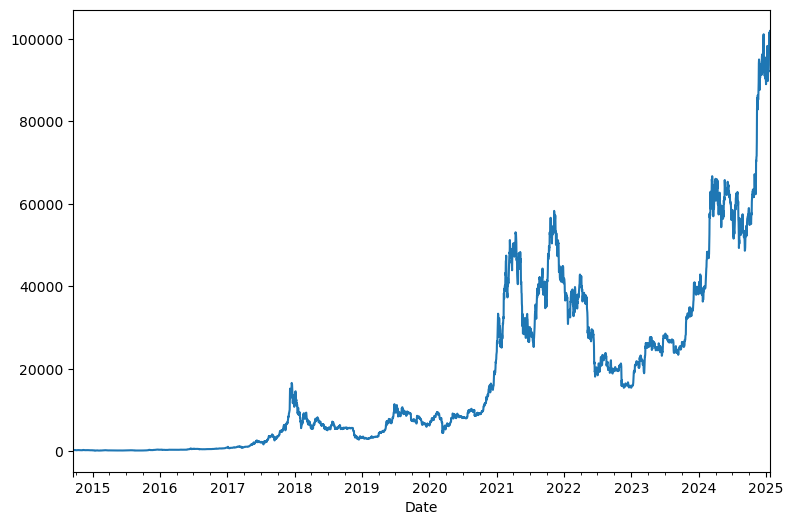

In [85]:
bitcoin["Close"].plot(figsize = (9,6))

In [87]:
bitcoin.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-18',
               '2025-01-19', '2025-01-20', '2025-01-21', '2025-01-22',
               '2025-01-23', '2025-01-24'],
              dtype='datetime64[ns]', name='Date', length=3783, freq=None)

<Axes: xlabel='Date'>

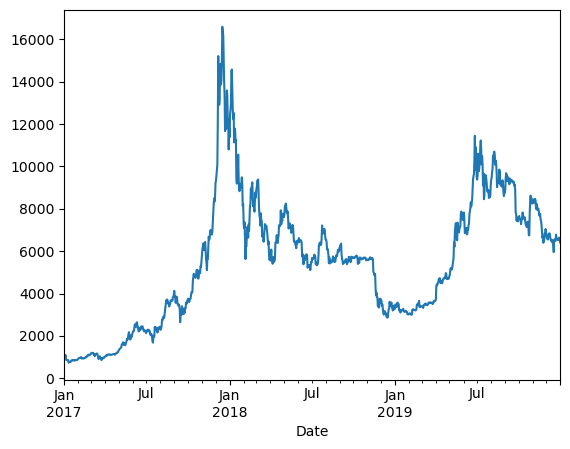

In [95]:
# Si on veut avoir l'evolution des bitcoin de 2017 a 2019
bitcoin.loc['2017':'2019', 'Close'].plot()

<Axes: xlabel='Date'>

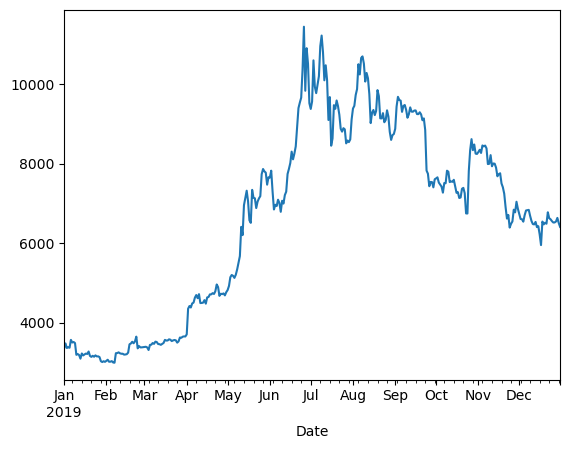

In [103]:
# Si on veut avoir l'evolution des bitcoin en 2019
bitcoin['2019':'2019']['Close'].plot()

In [ ]:
# Si jamas il ya une autre forme de date utiliser la fonction : 
# pd.to_datetime('2019.09.03')

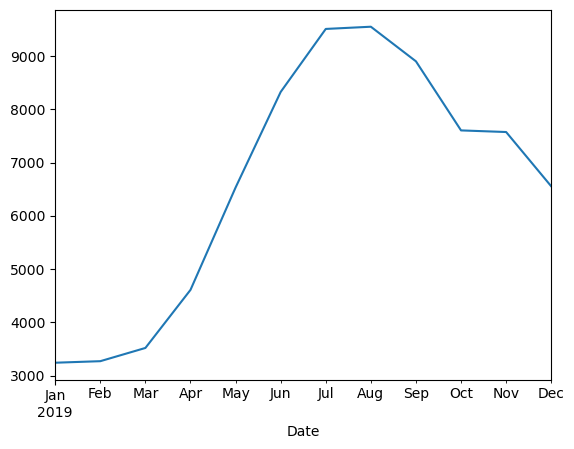

In [123]:
C= bitcoin.loc['2019', 'Close'].resample('ME').mean().plot()  # resample ici permet de regrouper les donnees en moyenne par mois avec resample(M)  
plt.show()

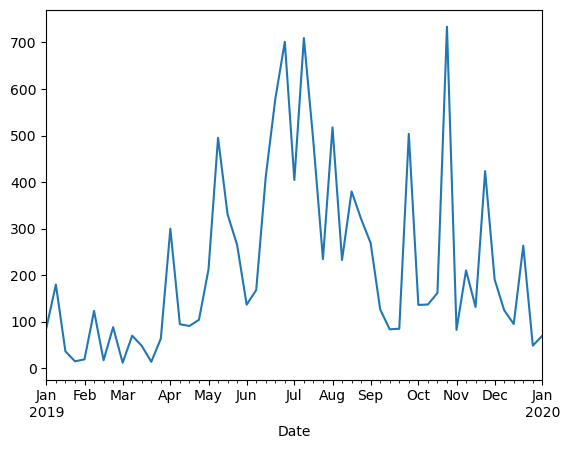

In [132]:
C= bitcoin.loc['2019', 'Close'].resample('W').std().plot()  # resample ici permet de regrouper les donnees ecart type par semaine avec resample(M)  
plt.show()  # l'ecart type montre a quel poit le bitcoin etait volatile en 2019

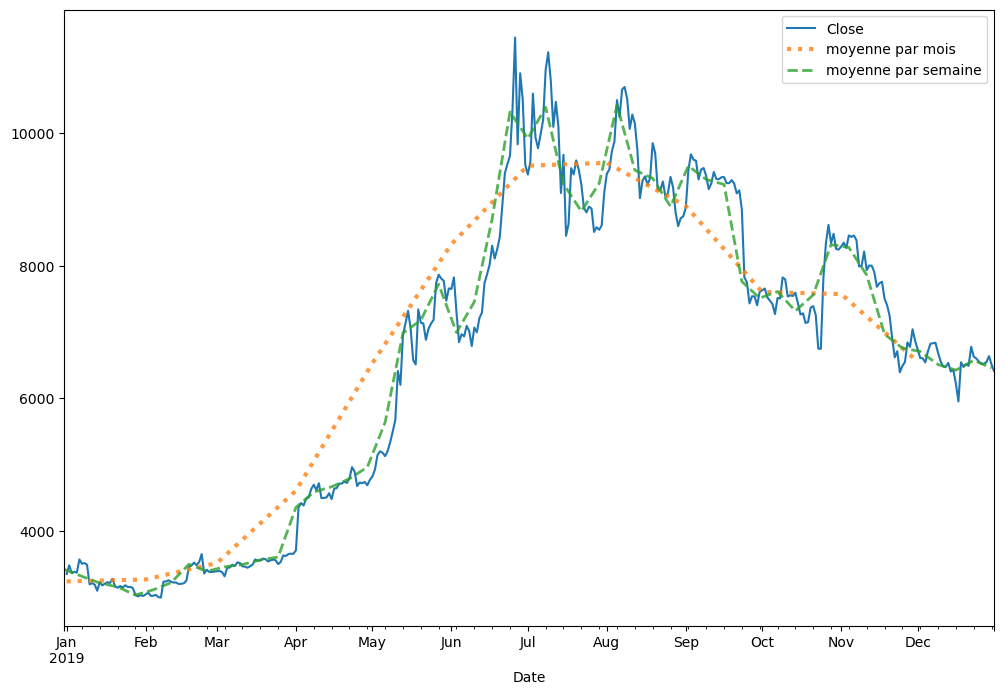

In [130]:
plt.figure(figsize=(12,8))
bitcoin.loc["2019", "Close"].plot()
bitcoin.loc["2019", "Close"].resample("ME").mean().plot(label="moyenne par mois", lw=3, ls=":", alpha=0.8)
bitcoin.loc["2019", "Close"].resample("W").mean().plot(label="moyenne par semaine", lw=2, ls="--", alpha=0.8)
plt.legend()
plt.show()

In [134]:
bitcoin.loc["2019", "Close"].resample("W").mean().agg(["mean", "std", "min", "max"])  # on met les differentes statistiques dans aggreagte

mean     6608.619354
std      2374.132802
min      3035.448347
max     10423.275112
Name: Close, dtype: float64

In [ ]:
m = bitcoin.loc["2019", "Close"].resample("W").mean().agg(["mean", "std", "min", "max"])
plt.figure (figsize=(12, 8))
m["mean"]["2019"].plot(label="moyenne par semaine")
plt.fill_between(m.index, m["max"], m["min"], alpha=0.2, label= "min-max par semaine")
plt.legend()
plt.show()

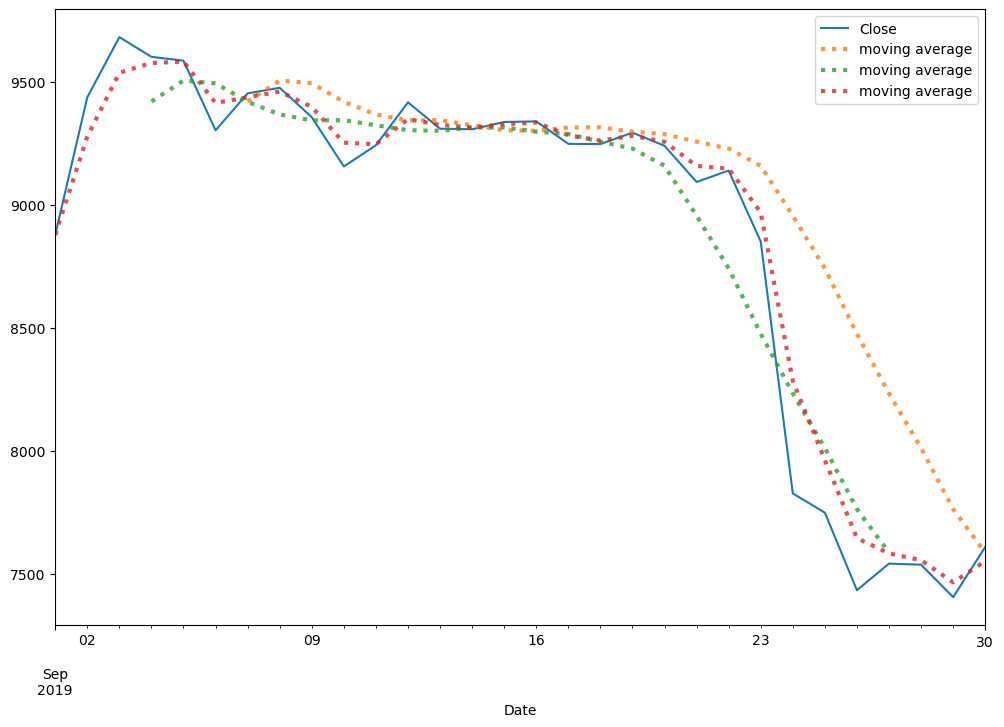

In [150]:
plt.figure (figsize=(12, 8))
bitcoin.loc["2019-09", "Close"].plot()
bitcoin.loc["2019-09","Close"].rolling(window = 7).mean().plot(label = "moving average", lw=3,  ls=":", alpha=0.8) # rolling definit une fenetre
bitcoin.loc["2019-09","Close"].rolling(window = 7, center = True).mean().plot(label = "moving average", lw=3,  ls=":", alpha=0.8)
bitcoin.loc["2019-09","Close"].ewm(alpha=0.6).mean().plot(label = "moving average", lw=3,  ls=":", alpha=0.8)
plt.legend()
plt.show()


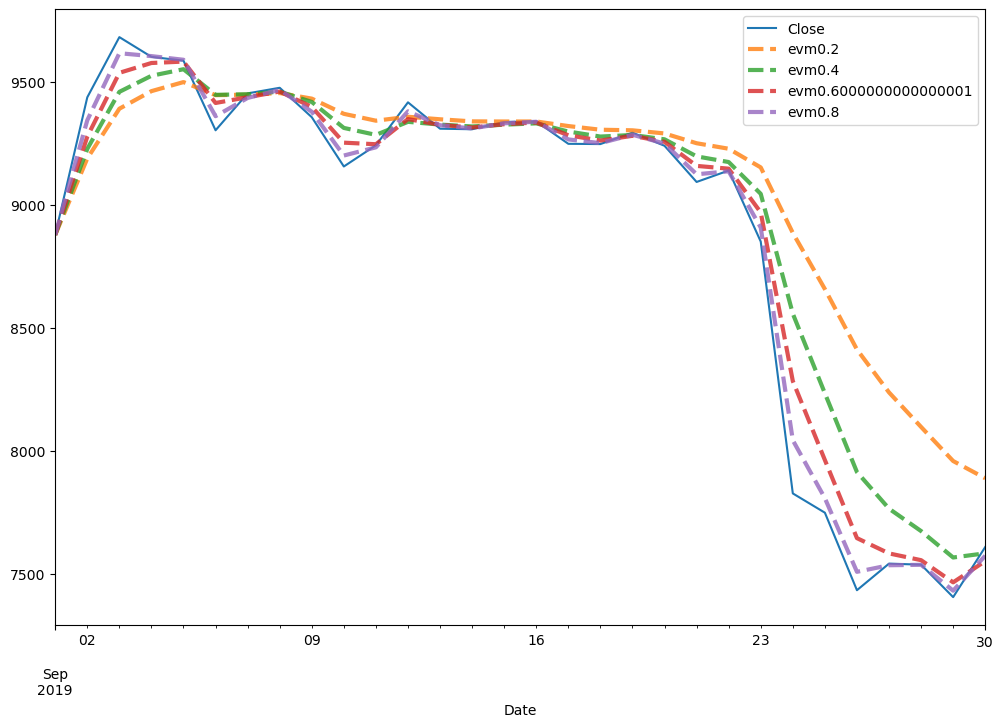

In [154]:
plt.figure (figsize=(12, 8))
bitcoin.loc["2019-09", "Close"].plot()
for i in np.arange(0.2,1,0.2):
    bitcoin.loc["2019-09","Close"].ewm(alpha=i).mean().plot(label = f"evm{i}", lw=3,  ls="--", alpha=0.8)
plt.legend()
plt.show()